In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats as stats
from scipy.stats import t

In [16]:
df = pd.read_excel('outputwithoutvybr.xlsx')
df

,Unnamed: 0,id,ключ_клиента,регион_проживания,город_проживания,возраст,пол,месяц_покупок,оборот_аптеки,оборот_рестораны,...,кэшбэк_дом_и_ремонт,кэшбэк_спорттовары,кэшбэк_животные,кэшбэк_цветы,кэшбэк_фастфуд,кэшбэк_каршеринг,кэшбэк_аренда_авто,is_vybr,agecat,int_cat
0,0,0,1889,Москва,Москва,50,M,2023-04-01 00:00:00,18993.0,99900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
1,1,1,1889,Москва,Москва,50,M,2023-05-01 00:00:00,37807.0,92424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
2,2,2,1889,Москва,Москва,50,M,2023-06-01 00:00:00,20791.0,124800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
3,3,3,1889,Москва,Москва,50,M,2023-07-01 00:00:00,131129.0,18060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
4,4,4,1889,Москва,Москва,50,M,2023-08-01 00:00:00,44096.0,198480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59821,59821,59821,1005319581,Москва,Москва,37,NaN,2023-05-01 00:00:00,657.0,54375.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,25-40,1
59822,59822,59822,1005319581,Москва,Москва,37,NaN,2023-06-01 00:00:00,NaN,128070.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,25-40,1
59823,59823,59823,1005319581,Москва,Москва,37,NaN,2023-07-01 00:00:00,5919.0,26085.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,25-40,1
59824,59824,59824,1005319581,Москва,Москва,37,NaN,2023-08-01 00:00:00,1705.0,111690.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,25-40,1


In [17]:
df = df[df['is_vybr'] == 0]
df

,Unnamed: 0,id,ключ_клиента,регион_проживания,город_проживания,возраст,пол,месяц_покупок,оборот_аптеки,оборот_рестораны,...,кэшбэк_дом_и_ремонт,кэшбэк_спорттовары,кэшбэк_животные,кэшбэк_цветы,кэшбэк_фастфуд,кэшбэк_каршеринг,кэшбэк_аренда_авто,is_vybr,agecat,int_cat
0,0,0,1889,Москва,Москва,50,M,2023-04-01 00:00:00,18993.0,99900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
1,1,1,1889,Москва,Москва,50,M,2023-05-01 00:00:00,37807.0,92424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
2,2,2,1889,Москва,Москва,50,M,2023-06-01 00:00:00,20791.0,124800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
3,3,3,1889,Москва,Москва,50,M,2023-07-01 00:00:00,131129.0,18060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
4,4,4,1889,Москва,Москва,50,M,2023-08-01 00:00:00,44096.0,198480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59815,59815,59815,1003493065,Республика Карелия,Петрозаводск,42,M,2023-05-01 00:00:00,18228.0,153096.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
59816,59816,59816,1003493065,Республика Карелия,Петрозаводск,42,M,2023-06-01 00:00:00,24807.0,163884.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
59817,59817,59817,1003493065,Республика Карелия,Петрозаводск,42,M,2023-07-01 00:00:00,16195.0,143451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2
59818,59818,59818,1003493065,Республика Карелия,Петрозаводск,42,M,2023-08-01 00:00:00,23215.0,88242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,41-56,2


In [18]:
categories = []
for i in df.columns:
  if i.startswith('оборот_'):
    categories.append(i[7:])
categories

['аптеки',
 'рестораны',
 'одежда_и_обувь',
 'автоуслуги',
 'супермаркеты',
 'такси',
 'красота',
 'развлечения',
 'жд_билеты',
 'образование',
 'дом_и_ремонт',
 'спорттовары',
 'животные',
 'цветы',
 'фастфуд',
 'каршеринг',
 'аренда_авто']

In [19]:
int_age_cat_to_cat = {0: '14-24', 1: '25-40', 2: '41-56', 3: '57-75', 4: '76+'}

In [20]:
for i in ['оборот_аптеки', 'оборот_рестораны',
       'оборот_одежда_и_обувь', 'оборот_автоуслуги', 'оборот_супермаркеты',
       'оборот_такси', 'оборот_красота', 'оборот_развлечения',
       'оборот_жд_билеты', 'оборот_образование', 'оборот_дом_и_ремонт',
       'оборот_спорттовары', 'оборот_животные', 'оборот_цветы',
       'оборот_фастфуд', 'оборот_каршеринг', 'оборот_аренда_авто','кэшбэк_аптеки', 'кэшбэк_рестораны',
       'кэшбэк_одежда_и_обувь', 'кэшбэк_автоуслуги', 'кэшбэк_супермаркеты',
       'кэшбэк_такси', 'кэшбэк_красота', 'кэшбэк_развлечения',
       'кэшбэк_жд_билеты', 'кэшбэк_образование', 'кэшбэк_дом_и_ремонт',
       'кэшбэк_спорттовары', 'кэшбэк_животные', 'кэшбэк_цветы',
       'кэшбэк_фастфуд', 'кэшбэк_каршеринг', 'кэшбэк_аренда_авто']:
    df[i] = df[i].fillna(0)

<ipython-input-20-dd360c98306d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].fillna(0)


14-24


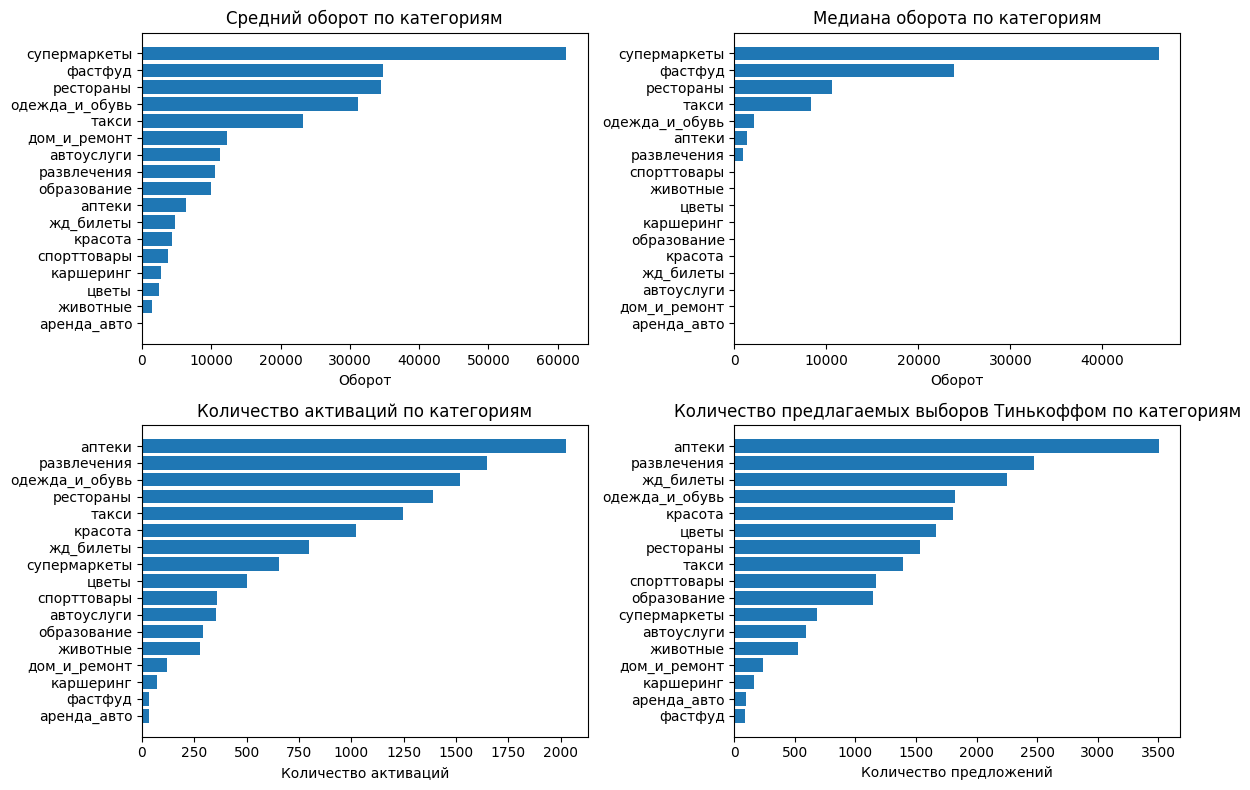

25-40


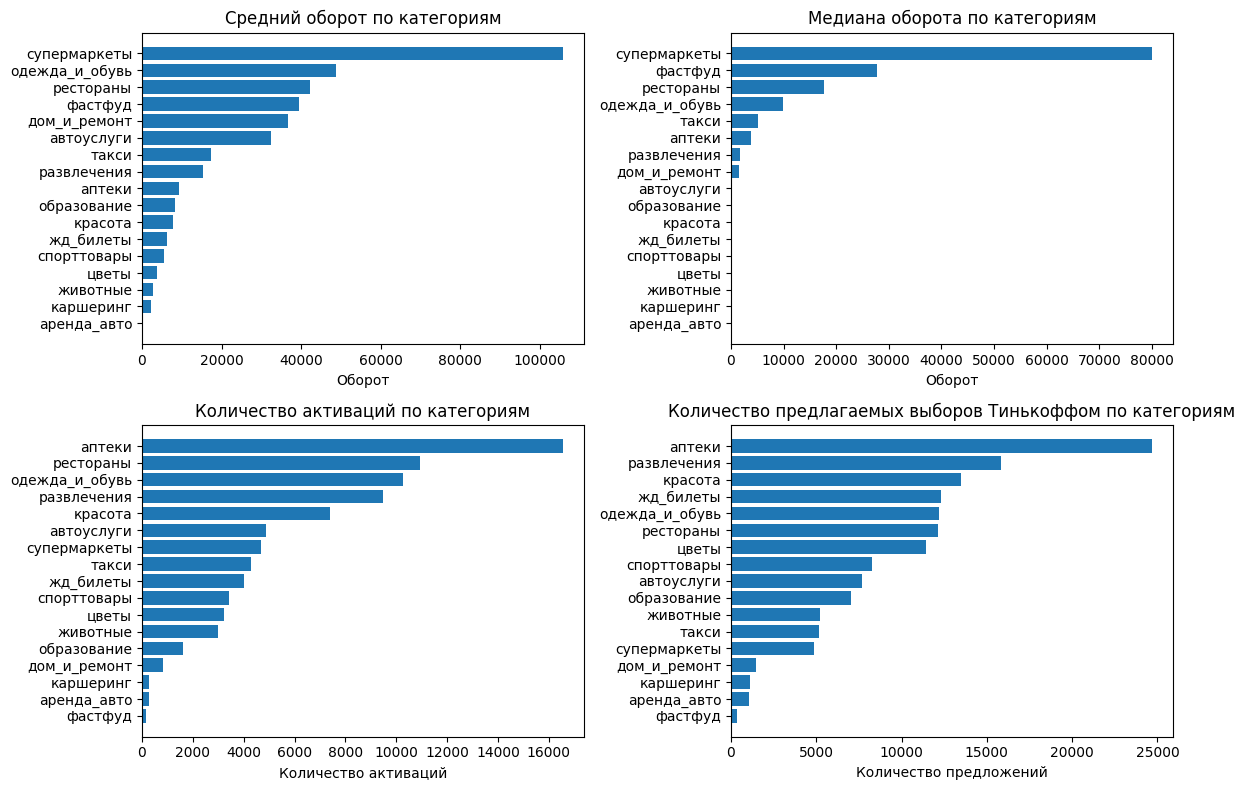

41-56


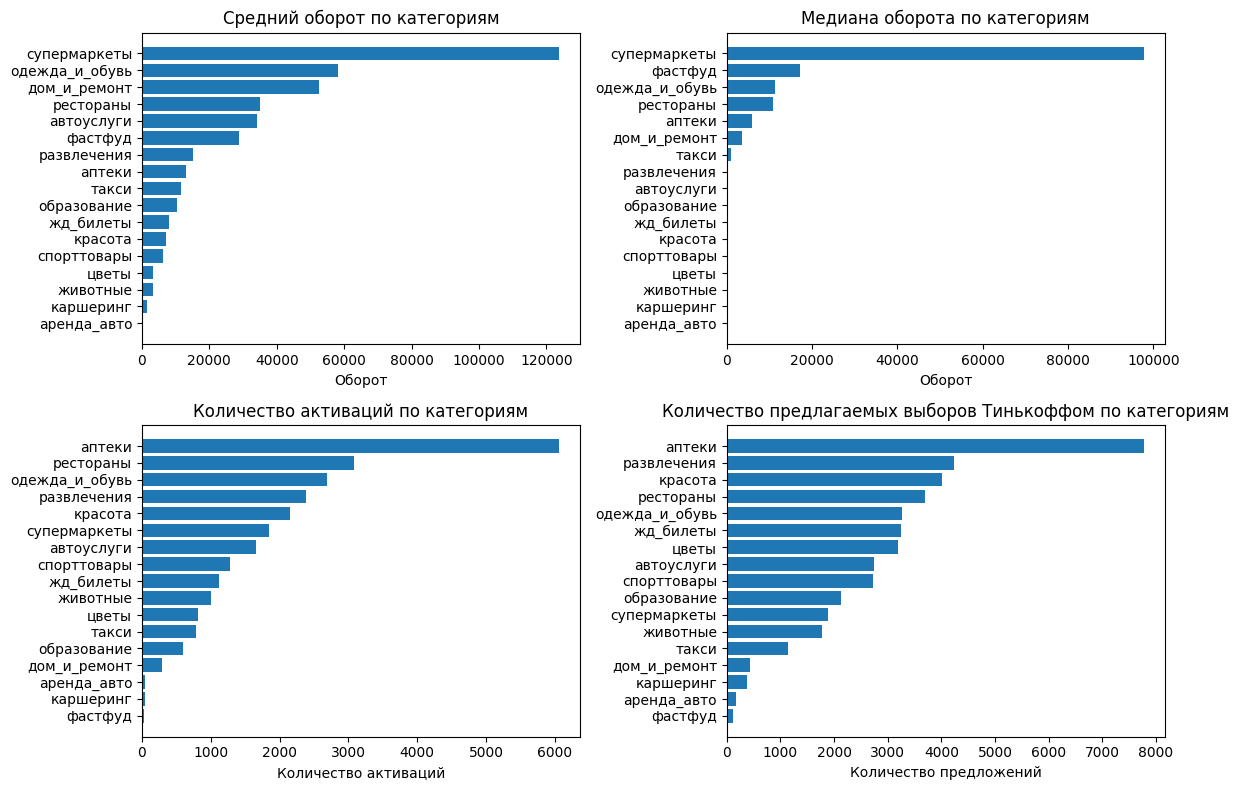

57-75


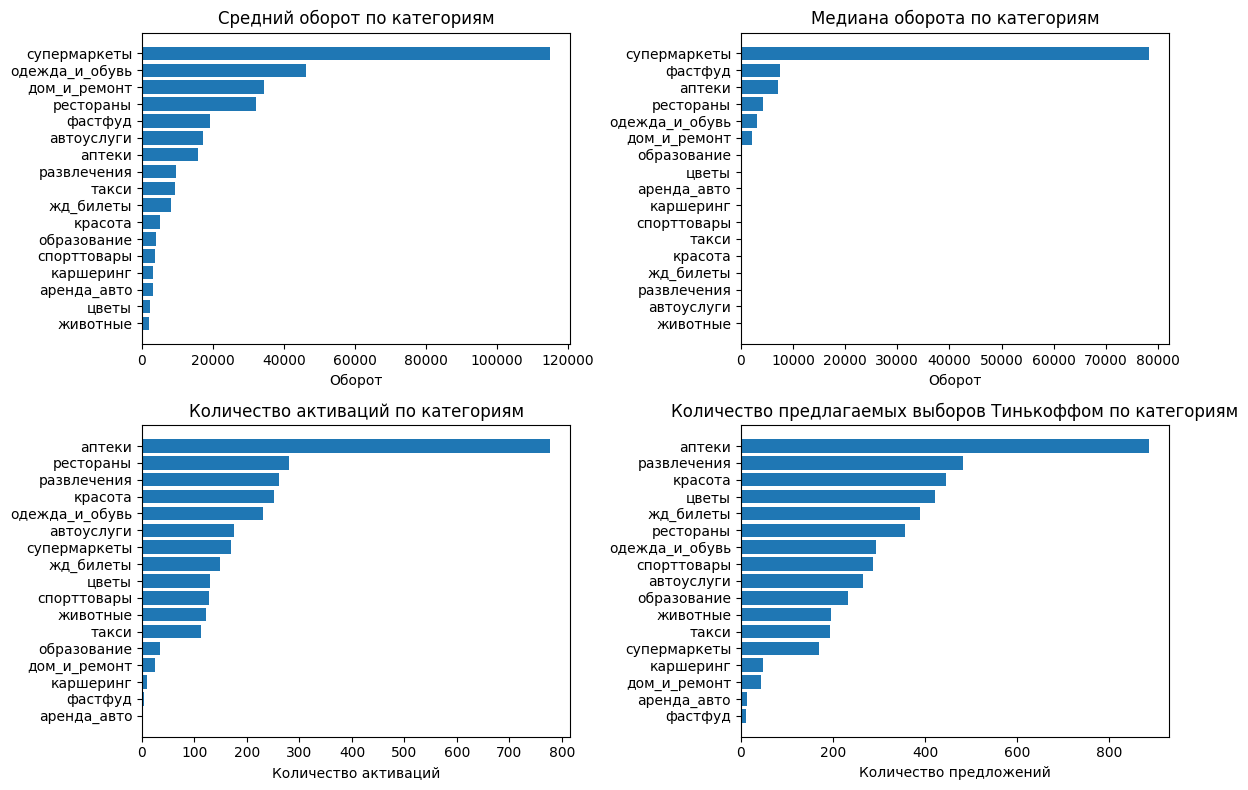

76+


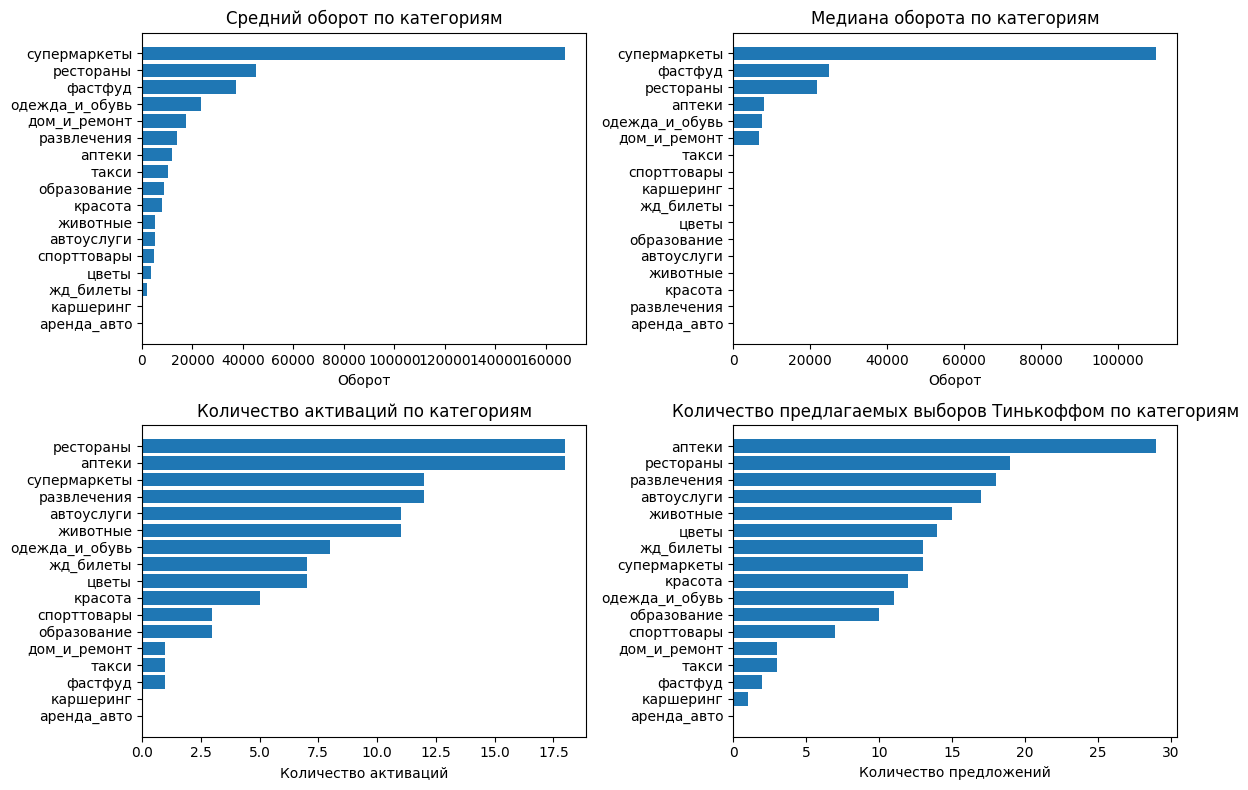

In [21]:
for age_int_cat in range(5):
    df_aged = df[df['int_cat'] == age_int_cat]
    result_df = pd.DataFrame(columns=['Category', 'mean', 'median', 'activations', 'proposed'])
    for cat in categories:
        mean = int(0 if np.isnan(float(df_aged[['оборот_'+cat]].mean())) else df_aged[['оборот_'+cat]].mean())
        median = int(0 if np.isnan(float(df_aged[['оборот_'+cat]].median())) else df_aged[['оборот_'+cat]].median())
        activations = len(df_aged[df_aged['активация_кэшбэка_'+cat] == 1])
        proposed = len(df_aged[(df_aged['активация_кэшбэка_'+cat] == 1) | (df_aged['активация_кэшбэка_'+cat] == 0)])

        new_row = pd.DataFrame({'Category': [cat], 'mean': [mean], 'median': [median], 'activations': [activations], 'proposed': [proposed]})
        result_df = pd.concat([result_df, new_row], ignore_index=True)


    print(df_aged['agecat'].iloc[0])

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    result_df = result_df.sort_values(by='mean')
    axes[0, 0].barh(result_df['Category'], result_df['mean'])
    axes[0, 0].set_xlabel('Оборот')
    axes[0, 0].set_title('Средний оборот по категориям')

    result_df = result_df.sort_values(by='median')
    axes[0, 1].barh(result_df['Category'], result_df['median'])
    axes[0, 1].set_xlabel('Оборот')
    axes[0, 1].set_title('Медиана оборота по категориям')

    result_df = result_df.sort_values(by='activations')
    axes[1, 0].barh(result_df['Category'], result_df['activations'])
    axes[1, 0].set_xlabel('Количество активаций')
    axes[1, 0].set_title('Количество активаций по категориям')

    result_df = result_df.sort_values(by='proposed')
    axes[1, 1].barh(result_df['Category'], result_df['proposed'])
    axes[1, 1].set_xlabel('Количество предложений')
    axes[1, 1].set_title('Количество предлагаемых выборов Тинькоффом по категориям')

    # Автоматическое выравнивание макета
    plt.tight_layout()

    plt.show()

14-24


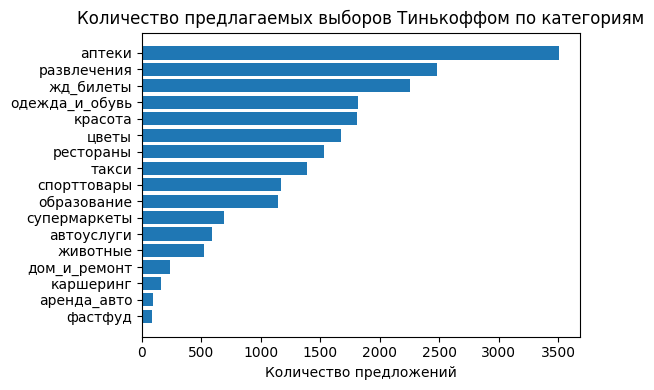

25-40


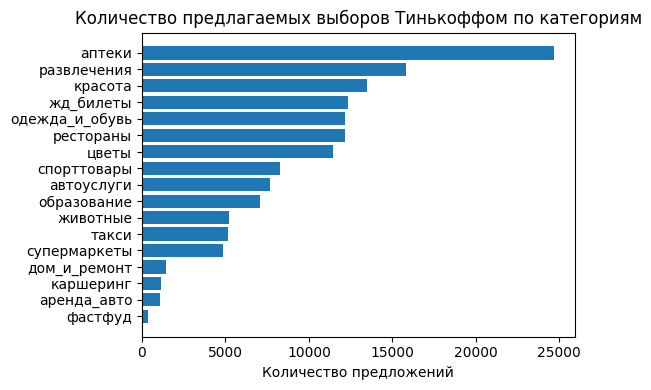

41-56


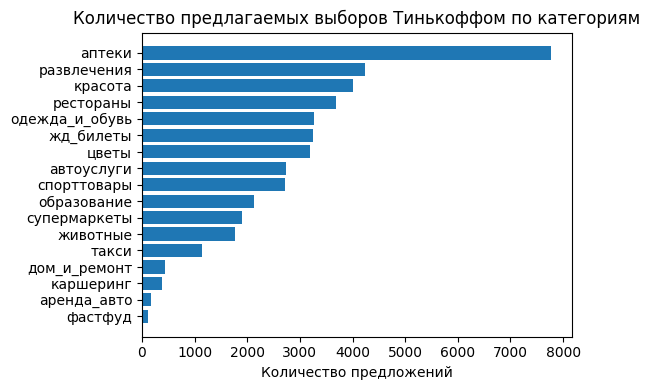

57-75


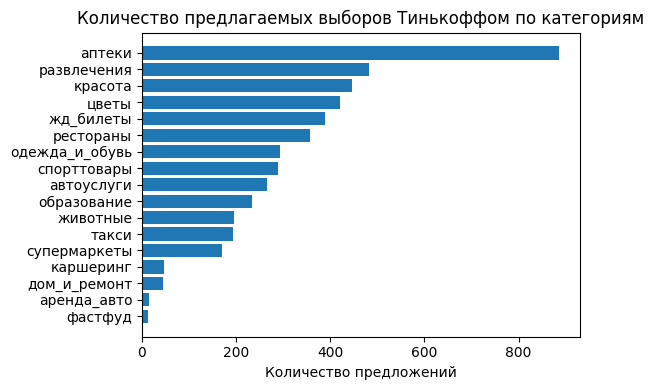

76+


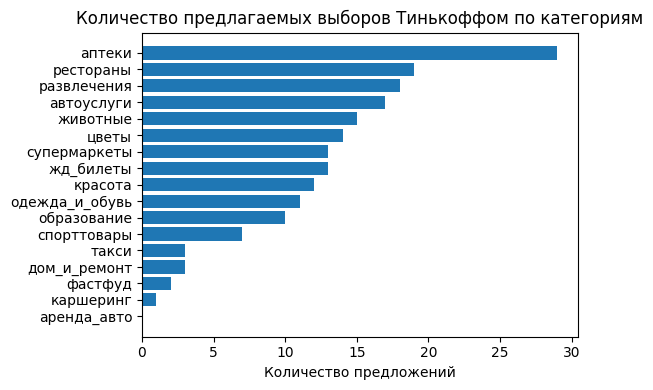

In [22]:
for age_int_cat in range(5):
    df_aged = df[df['int_cat'] == age_int_cat]
    result_df = pd.DataFrame(columns=['Category', 'mean', 'median', 'activations', 'proposed'])
    for cat in categories:
        mean = int(0 if np.isnan(float(df_aged[['оборот_'+cat]].mean())) else df_aged[['оборот_'+cat]].mean())
        median = int(0 if np.isnan(float(df_aged[['оборот_'+cat]].median())) else df_aged[['оборот_'+cat]].median())
        activations = len(df_aged[df_aged['активация_кэшбэка_'+cat] == 1])
        proposed = len(df_aged[(df_aged['активация_кэшбэка_'+cat] == 1) | (df_aged['активация_кэшбэка_'+cat] == 0)])

        new_row = pd.DataFrame({'Category': [cat], 'mean': [mean], 'median': [median], 'activations': [activations], 'proposed': [proposed]})
        result_df = pd.concat([result_df, new_row], ignore_index=True)


    print(df_aged['agecat'].iloc[0])
    fig, axes = plt.subplots(figsize=(6, 4))

    result_df = result_df.sort_values(by='proposed')
    axes.barh(result_df['Category'], result_df['proposed'])
    axes.set_xlabel('Количество предложений')
    axes.set_title('Количество предлагаемых выборов Тинькоффом по категориям')

    # Автоматическое выравнивание макета
    plt.tight_layout()

    plt.show()

In [23]:
selected_categories = {}

In [24]:
for age_int_cat in range(5):
    df_aged = df[df['int_cat'] == age_int_cat]
    result_df = pd.DataFrame(columns=['Category', 'mean', 'median', 'activations', 'proposed'])
    for cat in categories:
        mean = int(0 if np.isnan(float(df_aged[['оборот_'+cat]].mean())) else df_aged[['оборот_'+cat]].mean())
        median = int(0 if np.isnan(float(df_aged[['оборот_'+cat]].median())) else df_aged[['оборот_'+cat]].median())
        activations = len(df_aged[df_aged['активация_кэшбэка_'+cat] == 1])
        proposed = len(df_aged[(df_aged['активация_кэшбэка_'+cat] == 1) | (df_aged['активация_кэшбэка_'+cat] == 0)])

        new_row = pd.DataFrame({'Category': [cat], 'mean': [mean], 'median': [median], 'activations': [activations], 'proposed': [proposed]})
        result_df = pd.concat([result_df, new_row], ignore_index=True)


    print(df_aged['agecat'].iloc[0])

    result_df = result_df.sort_values(by='proposed')

    selected_categories[age_int_cat] = list(result_df['Category'])[::-1][:10]
    print(list(result_df['Category'])[::-1][:10])

14-24
['аптеки', 'развлечения', 'жд_билеты', 'одежда_и_обувь', 'красота', 'цветы', 'рестораны', 'такси', 'спорттовары', 'образование']
25-40
['аптеки', 'развлечения', 'красота', 'жд_билеты', 'одежда_и_обувь', 'рестораны', 'цветы', 'спорттовары', 'автоуслуги', 'образование']
41-56
['аптеки', 'развлечения', 'красота', 'рестораны', 'одежда_и_обувь', 'жд_билеты', 'цветы', 'автоуслуги', 'спорттовары', 'образование']
57-75
['аптеки', 'развлечения', 'красота', 'цветы', 'жд_билеты', 'рестораны', 'одежда_и_обувь', 'спорттовары', 'автоуслуги', 'образование']
76+
['аптеки', 'рестораны', 'развлечения', 'автоуслуги', 'животные', 'цветы', 'супермаркеты', 'жд_билеты', 'красота', 'одежда_и_обувь']


In [25]:
cat_set = list(set(selected_categories[0]+selected_categories[1]+selected_categories[2]+selected_categories[3]+selected_categories[4]))
cat_set

['животные',
 'цветы',
 'рестораны',
 'образование',
 'автоуслуги',
 'спорттовары',
 'такси',
 'аптеки',
 'красота',
 'жд_билеты',
 'одежда_и_обувь',
 'развлечения',
 'супермаркеты']

In [26]:
k_values = pd.DataFrame(columns=categories+['mean'])
for cat in categories:
    numerator = 2 * df[df['активация_кэшбэка_' + cat] == 1].groupby('ключ_клиента')['оборот_' + cat].mean()
    denominator = df[df['активация_кэшбэка_' + cat] != 1].groupby('ключ_клиента')['оборот_' + cat].mean()

    res = numerator / denominator
    res.fillna(0, inplace=True)
    res.replace([np.inf, -np.inf], -np.inf, inplace=True)
    res.replace([np.inf, -np.inf], max(res), inplace=True)

    k_values[cat] = res
k_values['mean'] = k_values.mean(axis=1)
k_values

,аптеки,рестораны,одежда_и_обувь,автоуслуги,супермаркеты,такси,красота,развлечения,жд_билеты,образование,дом_и_ремонт,спорттовары,животные,цветы,фастфуд,каршеринг,аренда_авто,mean
ключ_клиента,,,,,,,,,,,,,,,,,,
1889,1.953173,1.063282,0.000000,0.000000,0.000000,0.000000,2.914938,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.348905
191765,6.225542,1.186667,11.815154,14.686248,1.433757,0.000000,153.846154,0.000000,0.0,0.0,0.000000,0.0,1.251773,0.000000,0.0,0.000000,0.0,11.202664
256820,2.228998,0.000000,0.158730,20.896964,1.496449,0.000000,0.481678,1.379310,0.0,0.0,0.000000,0.0,0.000000,1.468085,0.0,0.000000,0.0,1.653542
282534,8.862560,6.917674,2.948892,0.000000,0.000000,0.000000,1.177918,0.000000,0.0,0.0,0.000000,0.0,3.960334,0.000000,0.0,2.956965,0.0,1.577903
283148,1.745482,38.367347,1.950830,0.000000,0.000000,0.000000,0.000000,0.267569,0.0,0.0,4.876986,0.0,0.000000,1.318523,0.0,0.000000,0.0,2.854514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002620484,10.622321,5.453384,3.621015,0.000000,0.000000,4.980481,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.331032,0.000000,0.0,0.000000,0.0,1.471073
1002982745,18.566265,0.000000,23.948250,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.864407,0.0,0.000000,0.0,2.610525
1002997975,1.100681,0.000000,50.057405,0.000000,0.000000,13.645898,0.000000,31.393162,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,5.658656


In [27]:
# Нулевая гипотеза (H0): Нет статистически значимых различий между группами.
# Альтернативная гипотеза (H1): Существуют статистически значимые различия.


# H0:
# Активация пользователем категории повышенного кэшбэка никак не влияет на увеличение оборота пользователей в этой категории
# H1:
# Активация пользователем категории повышенного кэшбэка положительно или отрицательно влияет на увеличение оборота пользователей в этой категории

alpha = 0.05:
14-24: H0: 0/10, H1: 10/10 (аптеки, развлечения, жд_билеты, одежда_и_обувь, красота, цветы, рестораны, такси, спорттовары, образование)
25-40: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, жд_билеты, одежда_и_обувь, рестораны, цветы, спорттовары, автоуслуги, образование)
41-56: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, рестораны, одежда_и_обувь, жд_билеты, цветы, автоуслуги, спорттовары, образование)
57-75: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, цветы, жд_билеты, рестораны, одежда_и_обувь, спорттовары, автоуслуги, образование)
76+: H0: 0/10, H1: 10/10 (аптеки, рестораны, развлечения, автоуслуги, животные, цветы, супермаркеты, жд_билеты, красота, одежда_и_обувь)


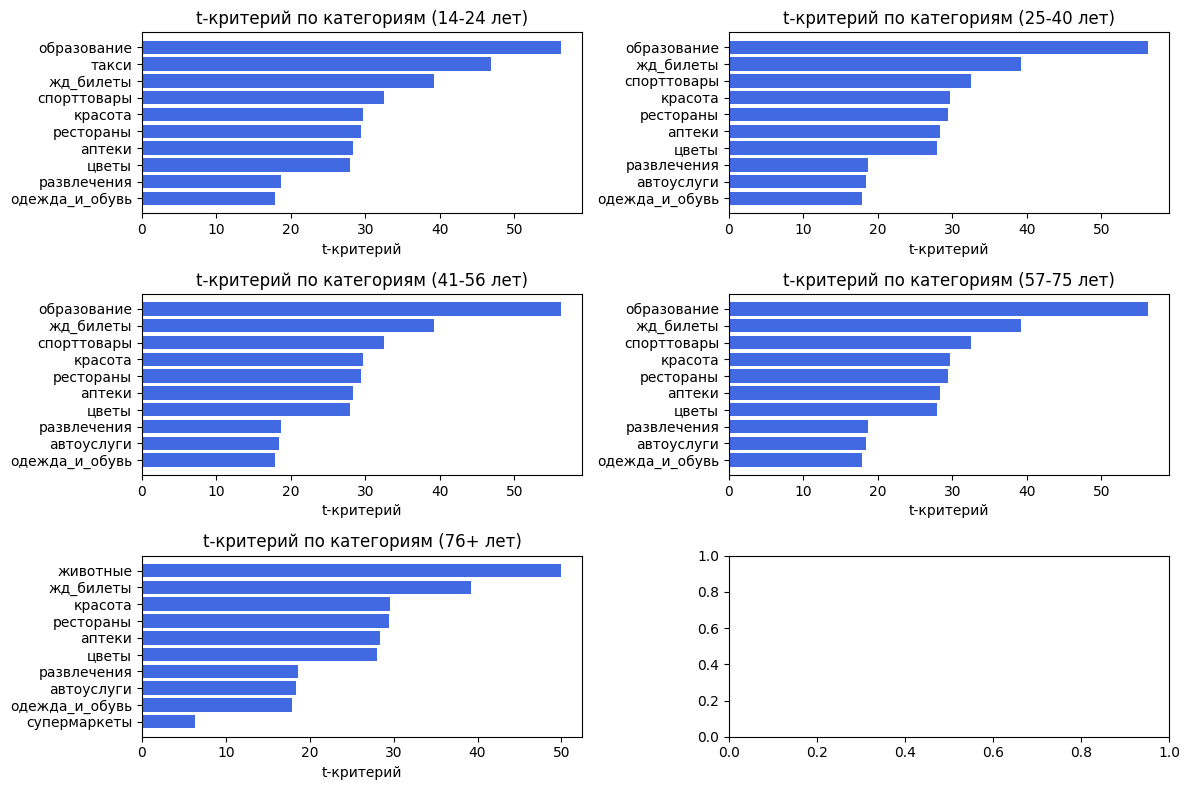

1.9600064368814036
alpha = 0.01:
14-24: H0: 0/10, H1: 10/10 (аптеки, развлечения, жд_билеты, одежда_и_обувь, красота, цветы, рестораны, такси, спорттовары, образование)
25-40: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, жд_билеты, одежда_и_обувь, рестораны, цветы, спорттовары, автоуслуги, образование)
41-56: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, рестораны, одежда_и_обувь, жд_билеты, цветы, автоуслуги, спорттовары, образование)
57-75: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, цветы, жд_билеты, рестораны, одежда_и_обувь, спорттовары, автоуслуги, образование)
76+: H0: 0/10, H1: 10/10 (аптеки, рестораны, развлечения, автоуслуги, животные, цветы, супермаркеты, жд_билеты, красота, одежда_и_обувь)


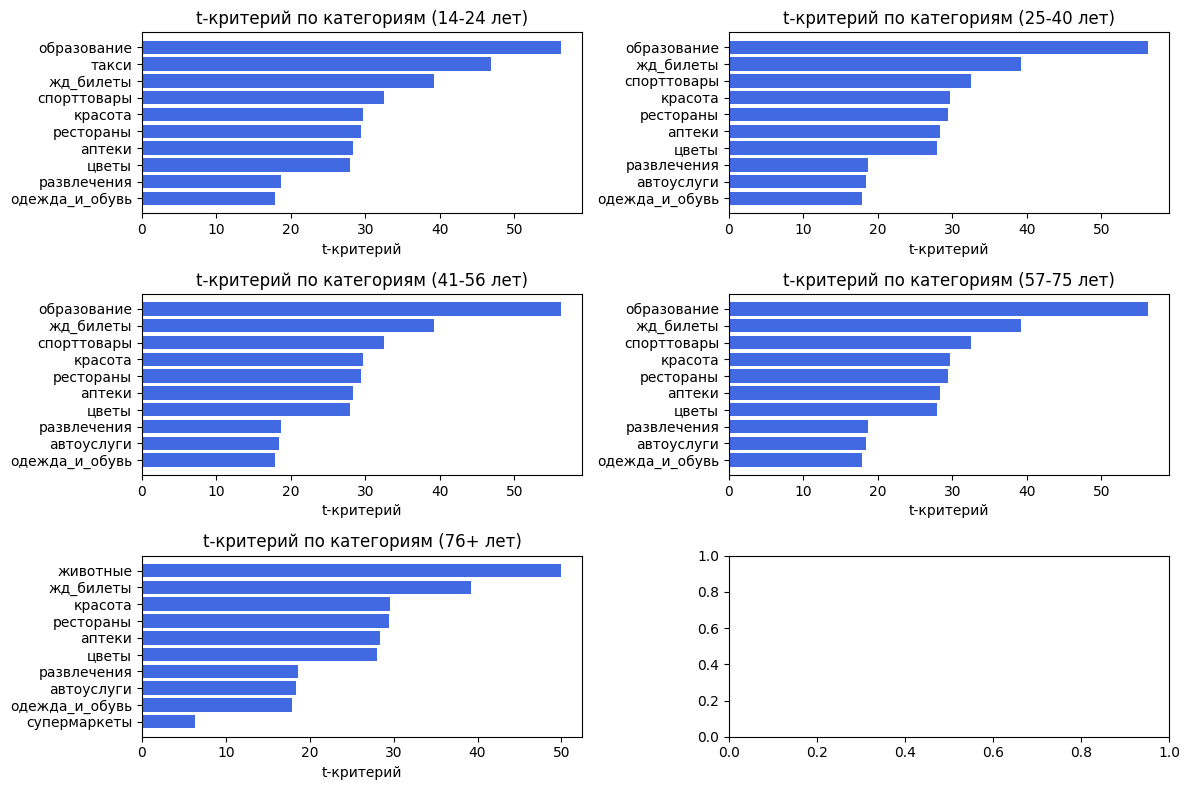

2.5759172872592053
alpha = 0.001:
14-24: H0: 0/10, H1: 10/10 (аптеки, развлечения, жд_билеты, одежда_и_обувь, красота, цветы, рестораны, такси, спорттовары, образование)
25-40: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, жд_билеты, одежда_и_обувь, рестораны, цветы, спорттовары, автоуслуги, образование)
41-56: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, рестораны, одежда_и_обувь, жд_билеты, цветы, автоуслуги, спорттовары, образование)
57-75: H0: 0/10, H1: 10/10 (аптеки, развлечения, красота, цветы, жд_билеты, рестораны, одежда_и_обувь, спорттовары, автоуслуги, образование)
76+: H0: 0/10, H1: 10/10 (аптеки, рестораны, развлечения, автоуслуги, животные, цветы, супермаркеты, жд_билеты, красота, одежда_и_обувь)


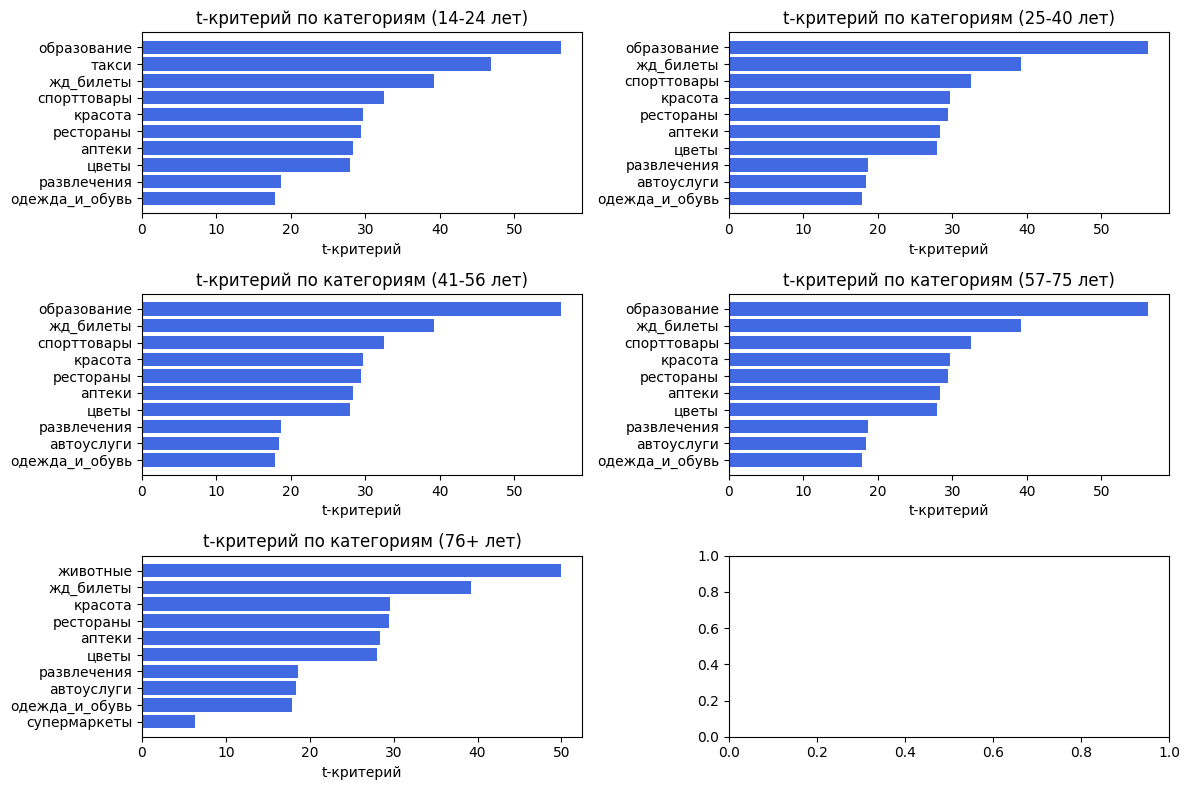

3.290700851930113


In [33]:
for alpha in [0.05, 0.01, 0.001]:
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
    print(f'alpha = {alpha}:')
    for i in range(5):
        count = 0
        ar = []
        pt = []
        for cat in selected_categories[i]:
            a = df[df['активация_кэшбэка_' + cat] == 1]['оборот_' + cat]
            b = df[df['активация_кэшбэка_' + cat] != 1]['оборот_' + cat]
            t_ob, p = stats.ttest_ind(a, b)
            degrees_of_freedom = stats.ttest_ind(a, b).df

            t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)

            if abs(t_ob) > abs(t_critical): # H1
                count += 1
                ar.append(cat)
                pt.append(t_ob)
            else: # H0
                pass

        print(f'{int_age_cat_to_cat[i]}: H0: {len(selected_categories[i])-count}/{len(selected_categories[i])}, H1: {count}/{len(selected_categories[i])} ({", ".join(ar)})')

        sorted_lists = sorted(list(zip(selected_categories[i], pt)), key=lambda x: x[1])
        selected_categories_sorted, pt_sorted = zip(*sorted_lists)

        axes[i//2, i%2].barh(selected_categories_sorted, pt_sorted, color='royalblue')
        axes[i//2, i%2].set_xlabel('t-критерий')
        axes[i//2, i%2].set_title(f't-критерий по категориям ({int_age_cat_to_cat[i]} лет)')

    plt.tight_layout()
    plt.show()
    print(t_critical)

In [29]:
df[df['активация_кэшбэка_' + cat] == 1]['оборот_' + cat]

13        97923.0
14         1080.0
17       231969.0
19            0.0
21         6597.0
           ...   
59791     12096.0
59798     11832.0
59801    167259.0
59804    117720.0
59812     68130.0
Name: оборот_одежда_и_обувь, Length: 14704, dtype: float64

In [30]:
            # a = df[df['активация_кэшбэка_' + cat] == 1].groupby('ключ_клиента')['оборот_' + cat].mean()
            # b = df[df['активация_кэшбэка_' + cat] != 1].groupby('ключ_клиента')['оборот_' + cat].mean()

alpha = 0.05:
H0: 1/17, H1: 16/17 (аптеки, рестораны, одежда_и_обувь, автоуслуги, супермаркеты, такси, красота, развлечения, жд_билеты, образование, дом_и_ремонт, спорттовары, животные, цветы, каршеринг, аренда_авто)


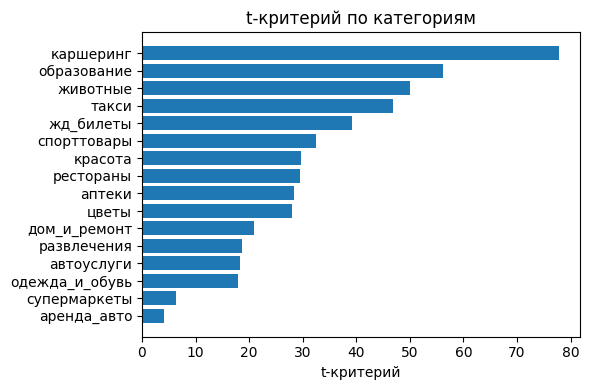

alpha = 0.01:
H0: 1/17, H1: 16/17 (аптеки, рестораны, одежда_и_обувь, автоуслуги, супермаркеты, такси, красота, развлечения, жд_билеты, образование, дом_и_ремонт, спорттовары, животные, цветы, каршеринг, аренда_авто)


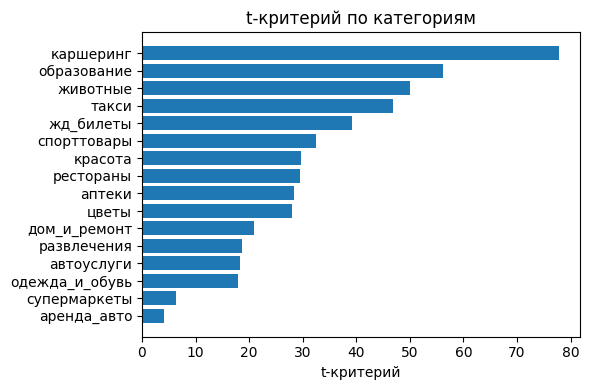

alpha = 0.001:
H0: 1/17, H1: 16/17 (аптеки, рестораны, одежда_и_обувь, автоуслуги, супермаркеты, такси, красота, развлечения, жд_билеты, образование, дом_и_ремонт, спорттовары, животные, цветы, каршеринг, аренда_авто)


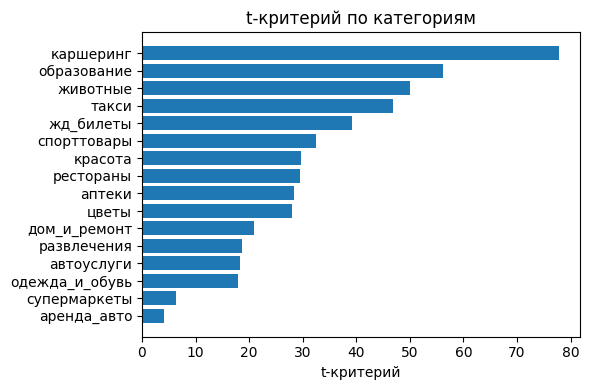

In [32]:
for alpha in [0.05, 0.01, 0.001]:
    print(f'alpha = {alpha}:')
    count = 0
    ar = []
    ps = pd.Series(dtype='float64')
    for cat in categories:
        a = df[df['активация_кэшбэка_' + cat] == 1]['оборот_' + cat]
        b = df[df['активация_кэшбэка_' + cat] != 1]['оборот_' + cat]
        t_ob, p = stats.ttest_ind(a, b)
        degrees_of_freedom = stats.ttest_ind(a, b).df

        t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)

        if abs(t_ob) > abs(t_critical): # H1 correct
            count += 1
            ar.append(cat)
            ps[cat] = t_ob
        else: # H0 correct
            pass
    print(f'H0: {len(categories)-count}/{len(categories)}, H1: {count}/{len(categories)} ({", ".join(ar)})')

    fig, axes = plt.subplots(figsize=(6, 4))

    ps = ps.sort_values()
    axes.barh(ps.index, list(ps))
    axes.set_xlabel('t-критерий')
    axes.set_title('t-критерий по категориям')
    # Автоматическое выравнивание макета
    plt.tight_layout()

    plt.show()

In [ ]:
# Нулевая гипотеза (H0): Нет статистически значимых различий между группами.
# Альтернативная гипотеза (H1): Существуют статистически значимые различия.


# Нулевая гипотеза (H0): Активация пользователем категории повышенного кэшбэка НЕ влияет на увеличение оборота пользователей в этой категории
# Альтернативная гипотеза (H1): Активация пользователем категории повышенного кэшбэка ВЛИЯЕТ на увеличение оборота пользователей в этой категории

In [ ]:
# 0 гипотеза:

# p_value < 0.05 => есть статистически значимые различия
# p_value > 0.05 => нет статистически значимые различия

In [ ]:
regions_of_russia = ['Алтайский край',
 'Амурская область',
 'Архангельская область',
 'Астраханская область',
 'Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Волгоградская область',
 'Вологодская область',
 'Воронежская область',
 'Москва',
 'Санкт-Петербург',
 'Севастополь',
 'Донецкая Народная Республика',
 'Еврейская автономная область',
 'Забайкальский край',
 'Запорожская область',
 'Ивановская область',
 'Иные территории,включая город и космодром Байконур',
 'Иркутская область',
 'Кабардино-Балкарская Республика',
 'Калининградская область',
 'Калужская область',
 'Камчатский край',
 'Карачаево-Черкесская Республика',
 'Кемеровская область — Кузбасс',
 'Кировская область',
 'Костромская область',
 'Краснодарский край',
 'Красноярский край',
 'Курганская область',
 'Курская область',
 'Ленинградская область',
 'Липецкая область',
 'Луганская Народная Республика',
 'Магаданская область',
 'Московская область',
 'Мурманская область',
 'Ненецкий автономный округ',
 'Нижегородская область',
 'Новгородская область',
 'Новосибирская область',
 'Омская область',
 'Оренбургская область',
 'Орловская область',
 'Пензенская область',
 'Пермский край',
 'Приморский край',
 'Псковская область',
 'Республика Адыгея (Адыгея)',
 'Республика Алтай',
 'Республика Башкортостан',
 'Республика Бурятия',
 'Республика Дагестан',
 'Республика Ингушетия',
 'Республика Калмыкия',
 'Республика Карелия',
 'Республика Коми',
 'Республика Крым',
 'Республика Марий Эл',
 'Республика Мордовия',
 'Республика Саха (Якутия)',
 'Республика Северная Осетия — Алания',
 'Республика Татарстан (Татарстан)',
 'Республика Тыва',
 'Республика Хакасия',
 'Ростовская область',
 'Рязанская область',
 'Самарская область',
 'Саратовская область',
 'Сахалинская область',
 'Свердловская область',
 'Смоленская область',
 'Ставропольский край',
 'Тамбовская область',
 'Тверская область',
 'Томская область',
 'Тульская область',
 'Тюменская область',
 'Удмуртская Республика',
 'Ульяновская область',
 'Хабаровский край',
 'Ханты-Мансийский автономный округ — Югра',
 'Херсонская область',
 'Челябинская область',
 'Чеченская Республика',
 'Чувашская Республика — Чувашия',
 'Чукотский автономный округ',
 'Ямало-Ненецкий автономный округ',
 'Ярославская область',
 '']

In [ ]:
for i in regions_of_russia:
    if i not in df['регион_проживания'].unique():
        print(i)

Донецкая Народная Республика
Запорожская область
Иные территории,включая город и космодром Байконур
Кабардино-Балкарская Республика
Карачаево-Черкесская Республика
Кемеровская область — Кузбасс
Луганская Народная Республика
Республика Адыгея (Адыгея)
Республика Алтай
Республика Ингушетия
Республика Северная Осетия — Алания
Республика Татарстан (Татарстан)
Удмуртская Республика
Ханты-Мансийский автономный округ — Югра
Херсонская область
Чеченская Республика
Чувашская Республика — Чувашия
Чукотский автономный округ



In [ ]:
'''
Донецкая Народная Республика
Запорожская область
Луганская Народная Республика
Республика Алтай
Республика Ингушетия
Удмуртская Республика
Херсонская область
Чеченская Республика
Чукотский автономный округ
'''

In [ ]:
sorted(df['регион_проживания'].unique())

['Алтайский край',
 'Амурская область',
 'Архангельская область',
 'Астраханская область',
 'Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Волгоградская область',
 'Вологодская область',
 'Воронежская область',
 'Еврейская автономная область',
 'Забайкальский край',
 'Ивановская область',
 'Иркутская область',
 'Калининградская область',
 'Калужская область',
 'Камчатский край',
 'Кемеровская область',
 'Кировская область',
 'Костромская область',
 'Краснодарский край',
 'Красноярский край',
 'Курганская область',
 'Курская область',
 'Ленинградская область',
 'Липецкая область',
 'Магаданская область',
 'Москва',
 'Московская область',
 'Мурманская область',
 'Ненецкий автономный округ',
 'Нижегородская область',
 'Новгородская область',
 'Новосибирская область',
 'Омская область',
 'Оренбургская область',
 'Орловская область',
 'Пензенская область',
 'Пермский край',
 'Приморский край',
 'Псковская область',
 'Республика Адыгея',
 'Республика Башкортостан',
 

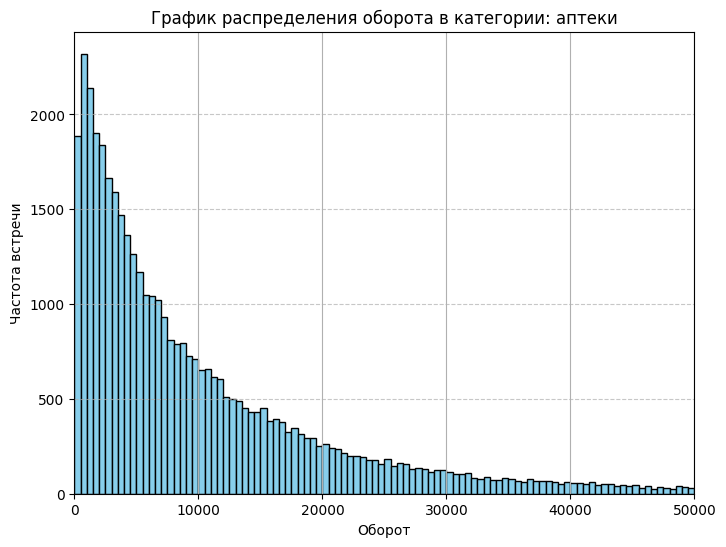

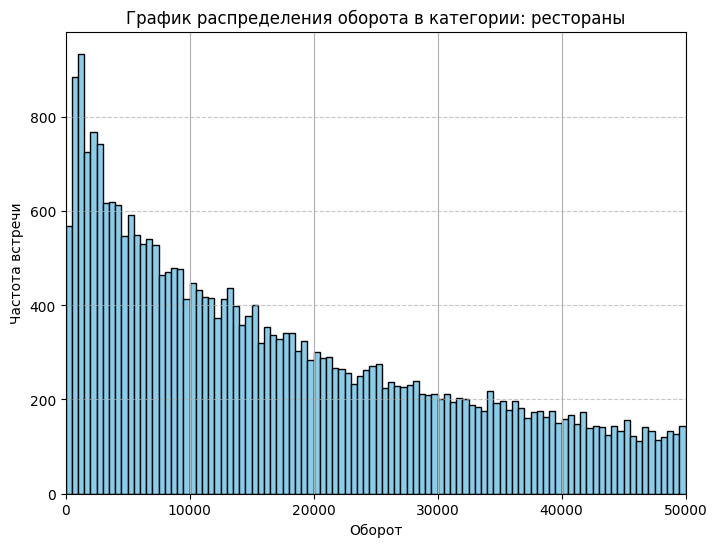

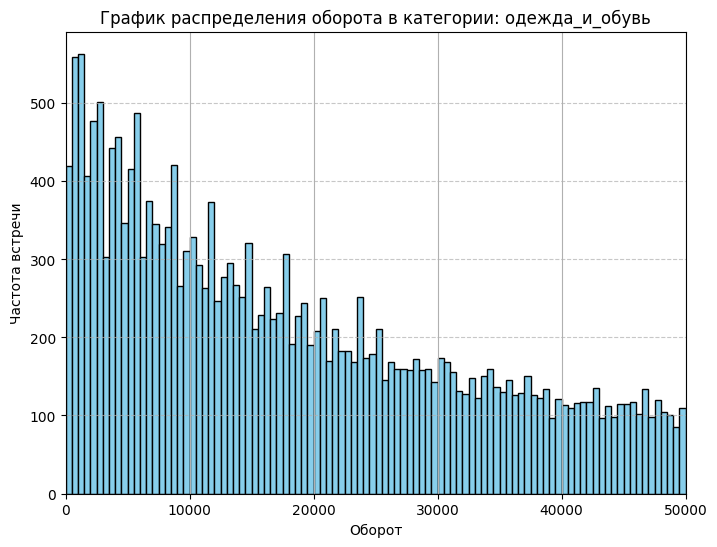

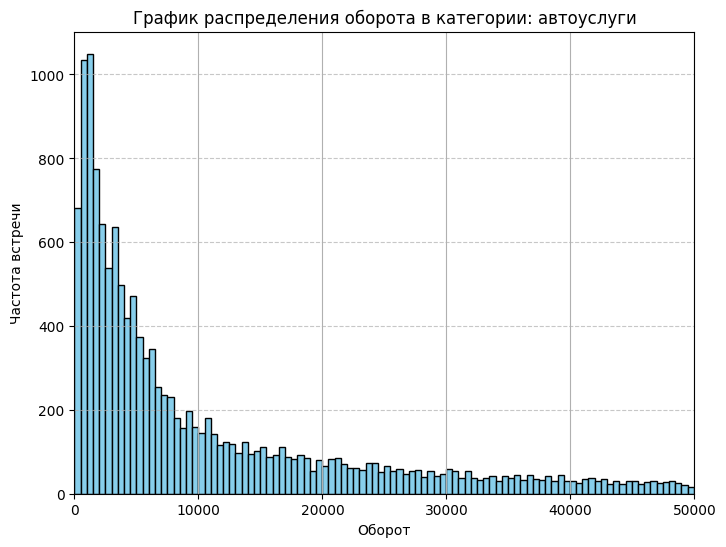

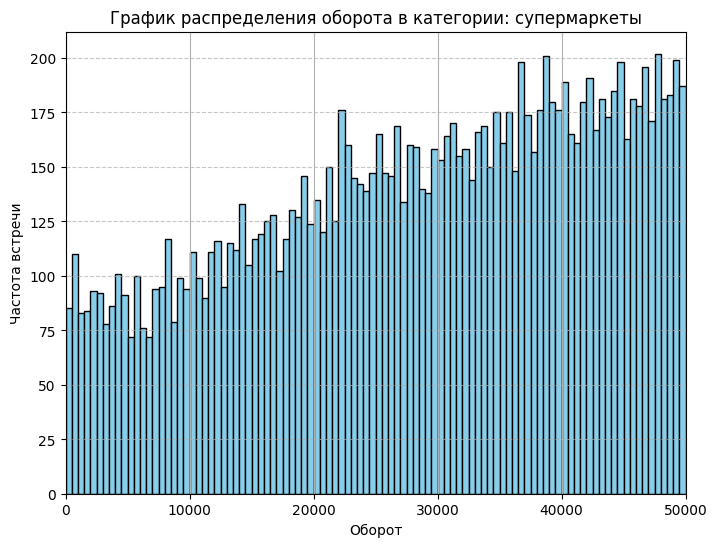

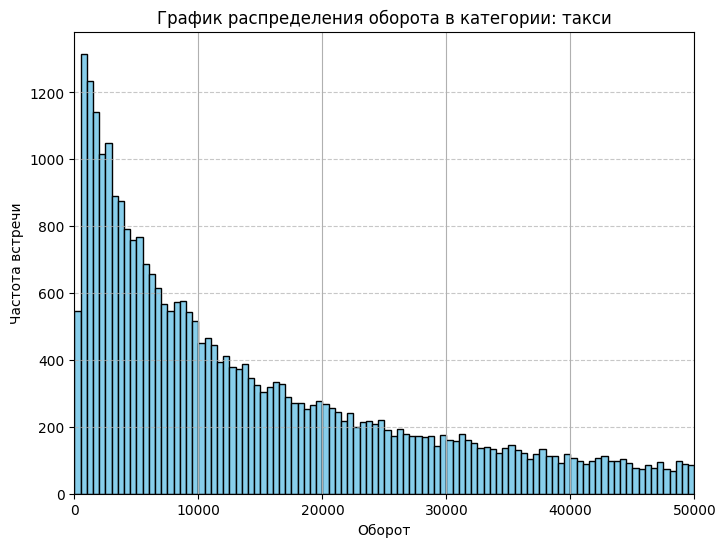

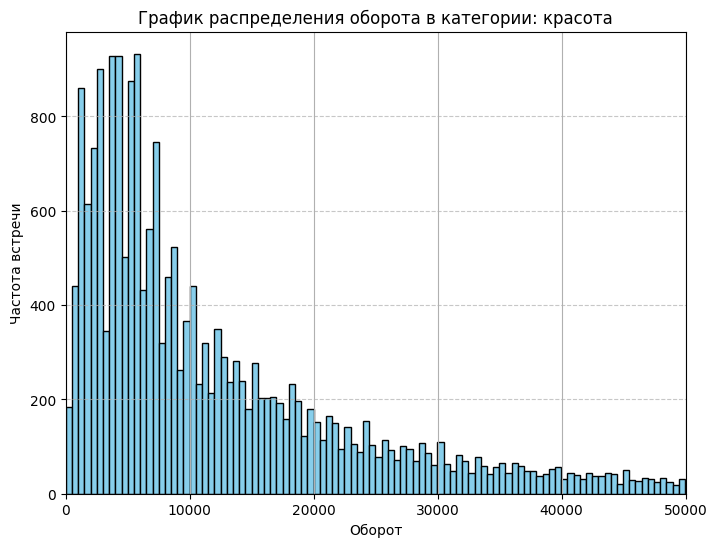

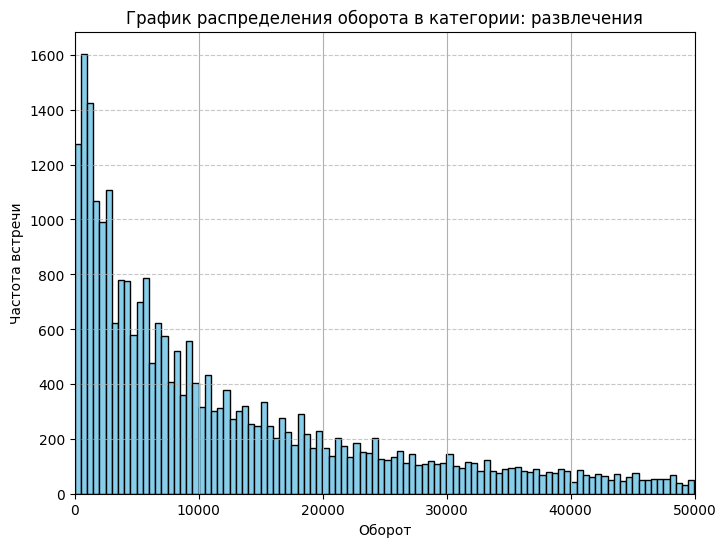

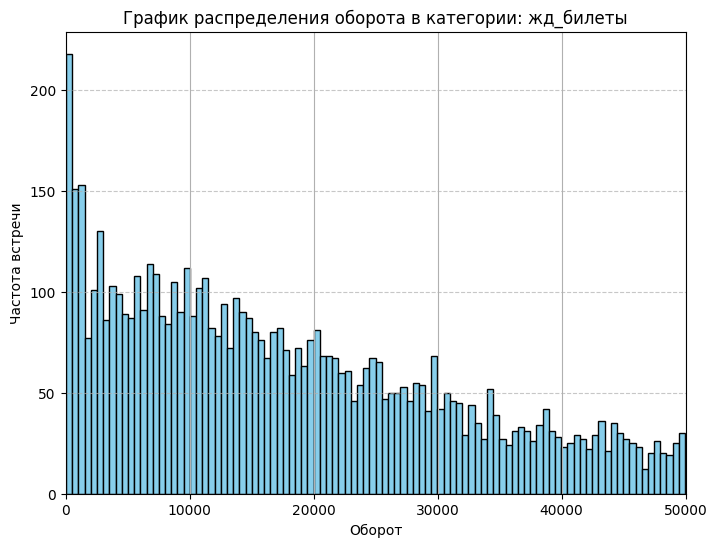

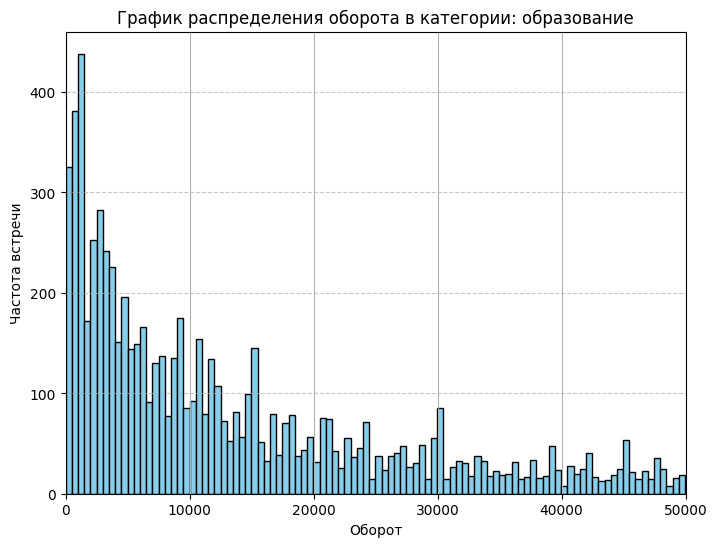

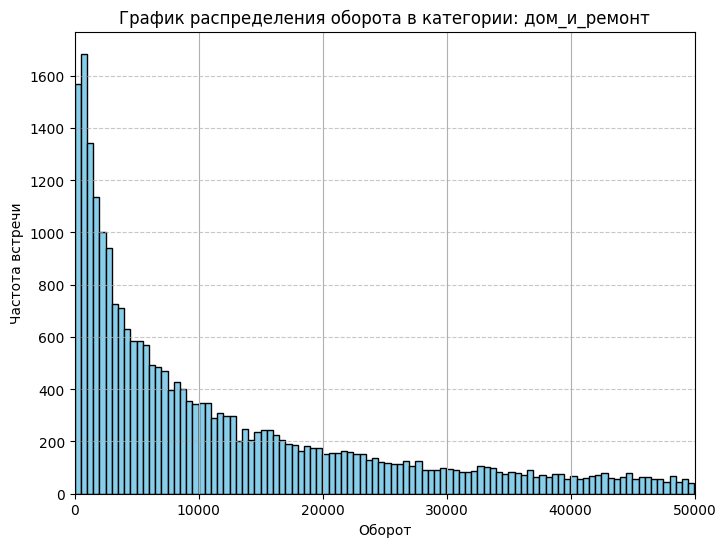

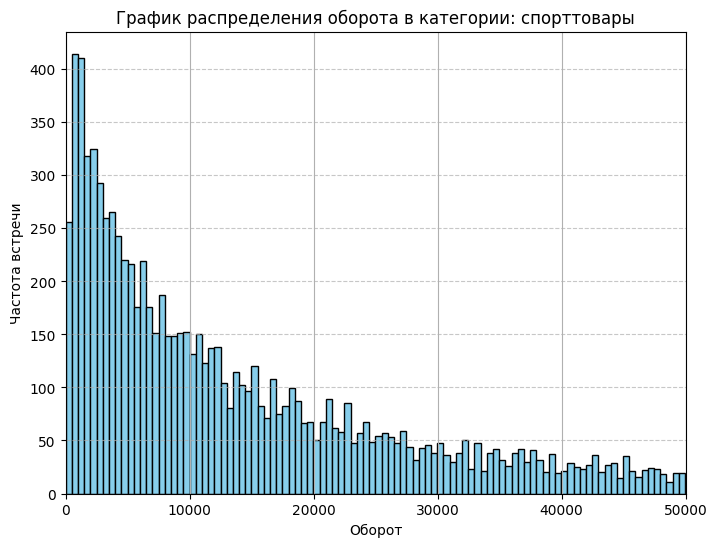

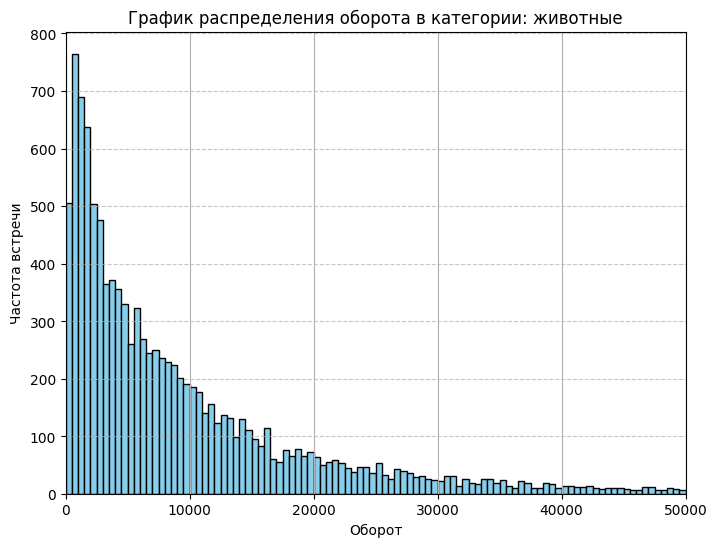

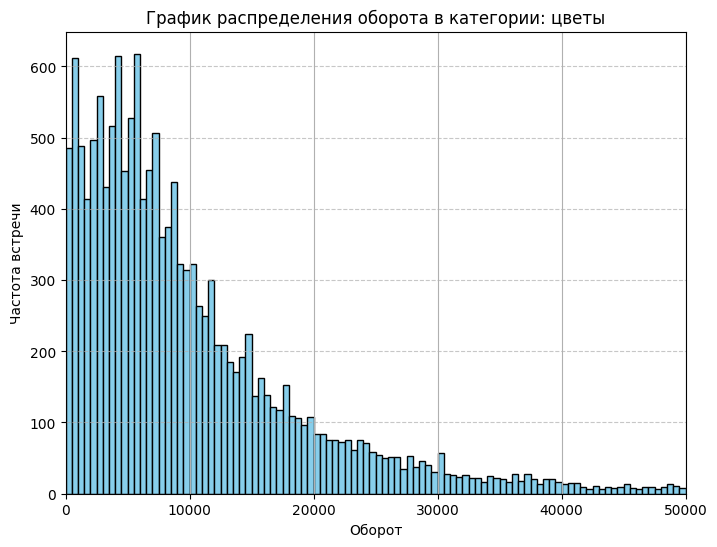

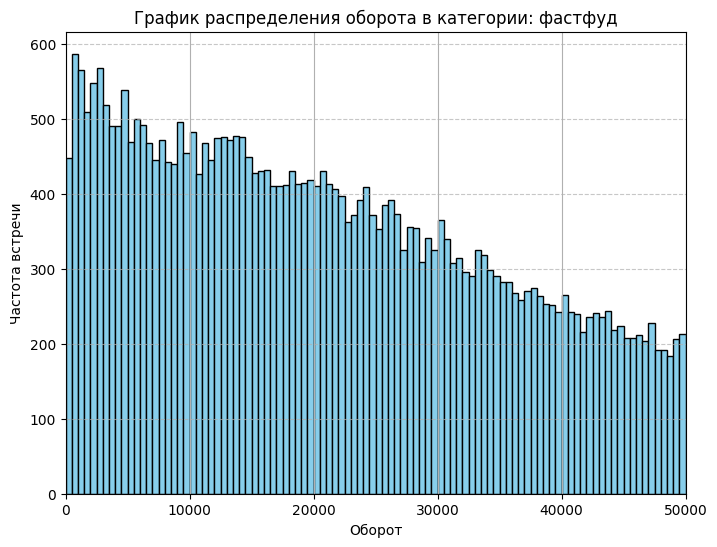

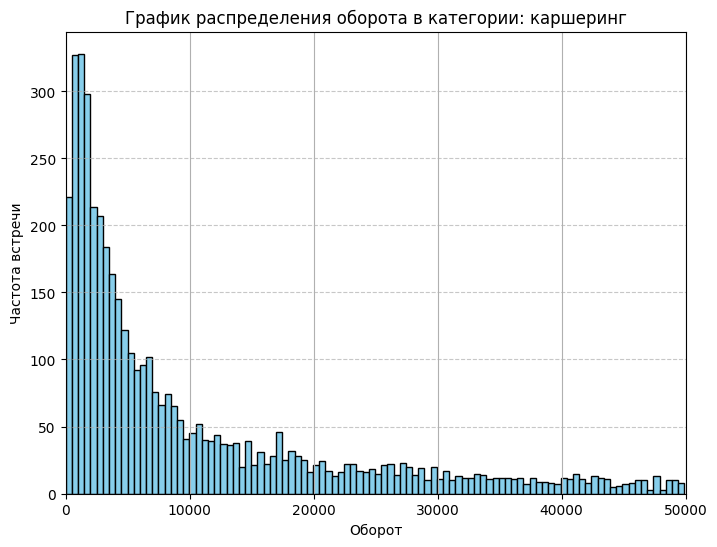

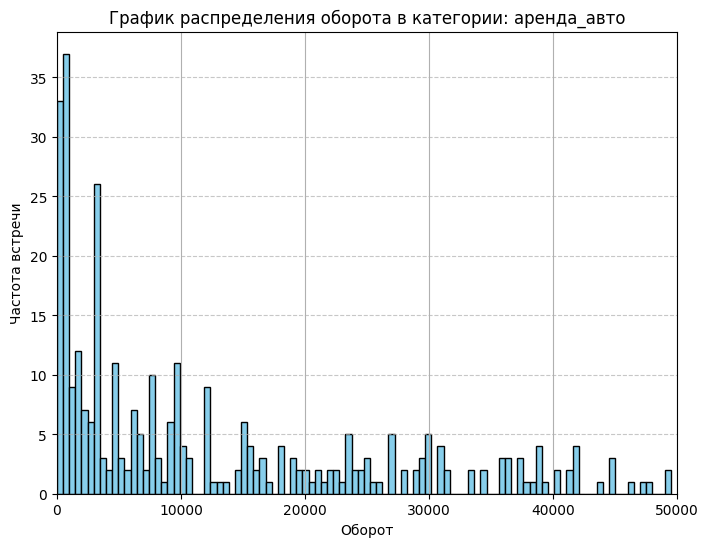

In [ ]:
for cat in categories:
    category = 'оборот_' + cat
    plt.figure(figsize=(8, 6))
    value_limit = 50000
    filtered_data = df.dropna(subset=[category])[(df[category] < value_limit) & (df['is_vybr'] == 0) & (df[category] != 0)]
    filtered_data[category].hist(bins=100, color='skyblue', edgecolor='black')
    plt.title('График распределения оборота в категории: ' + cat)
    plt.xlabel('Оборот')
    plt.ylabel('Частота встречи')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(0, value_limit)
    plt.show()

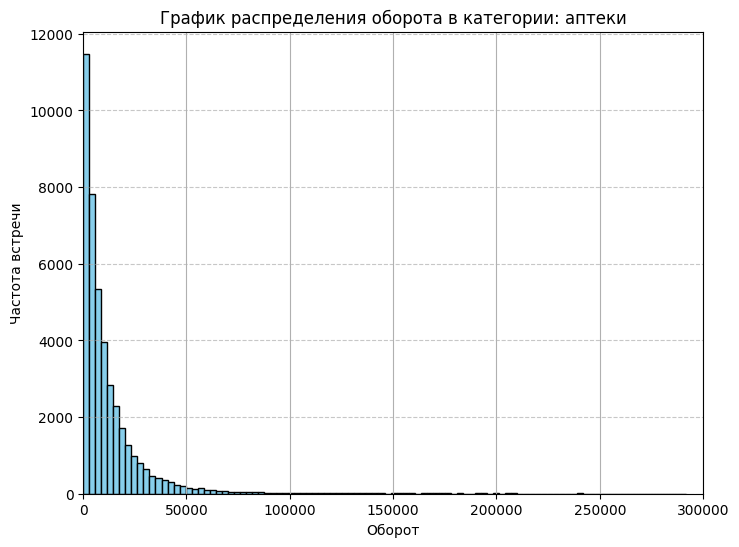

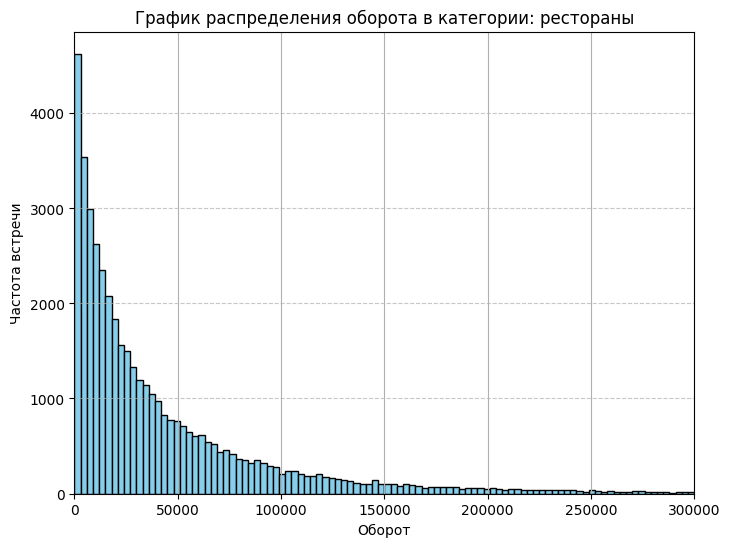

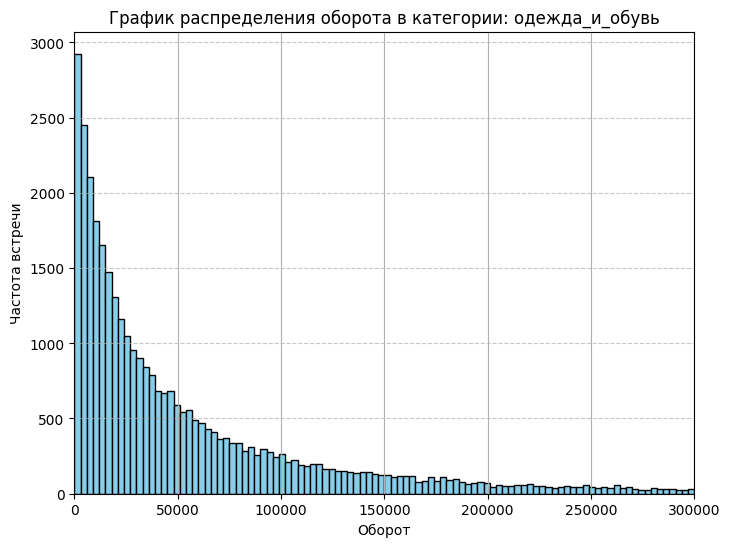

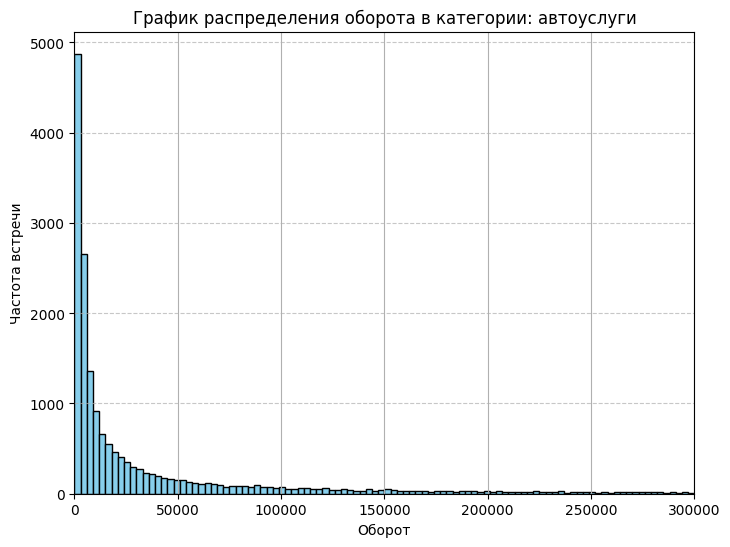

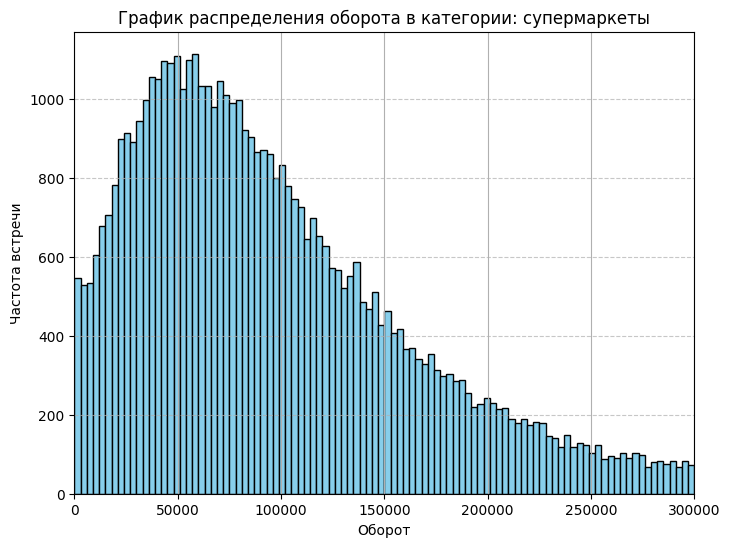

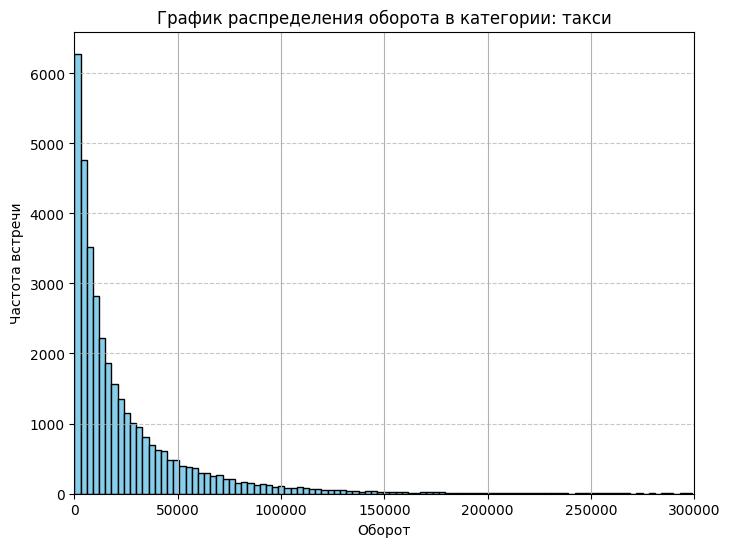

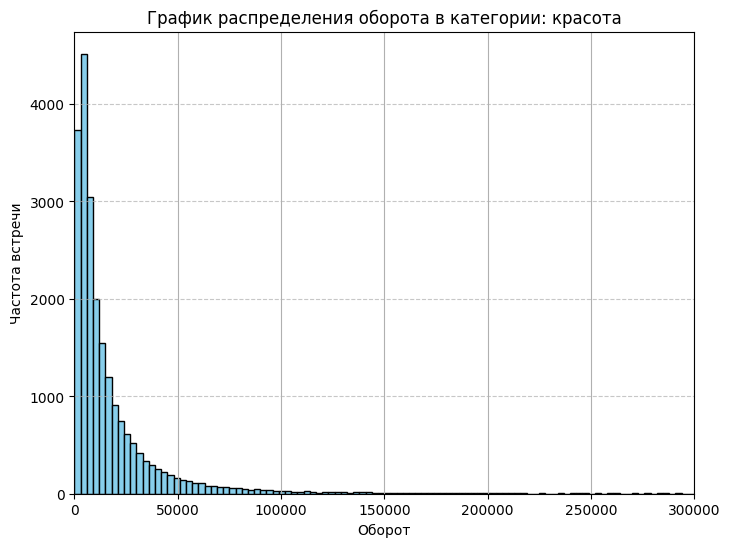

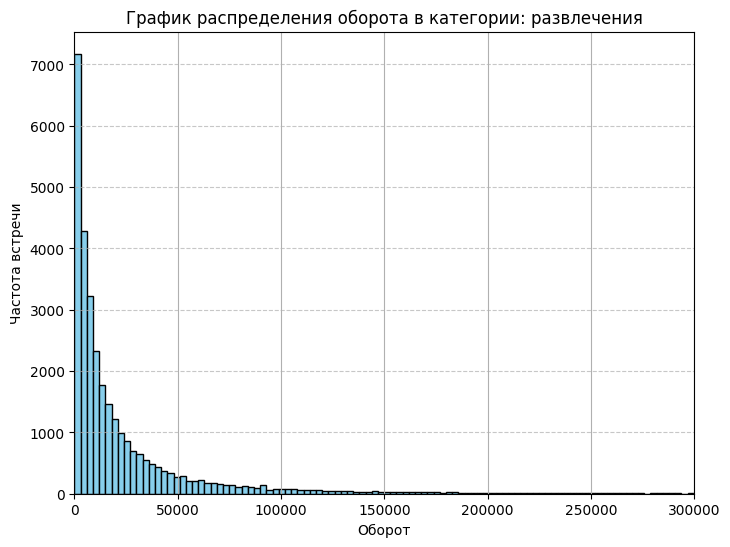

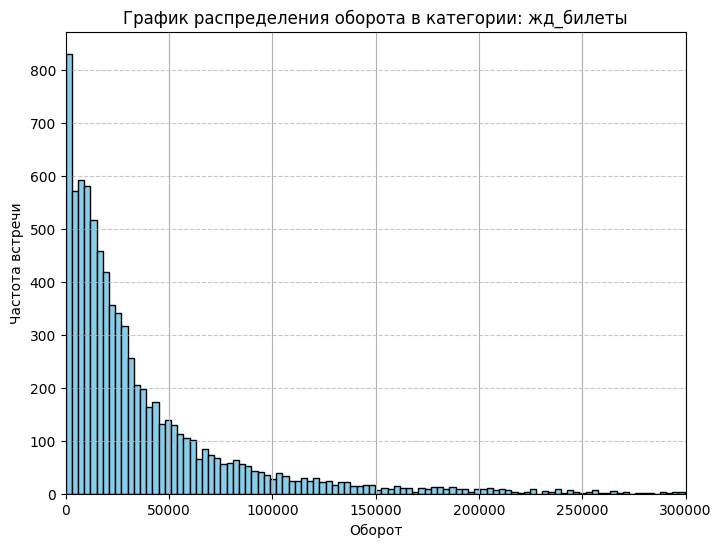

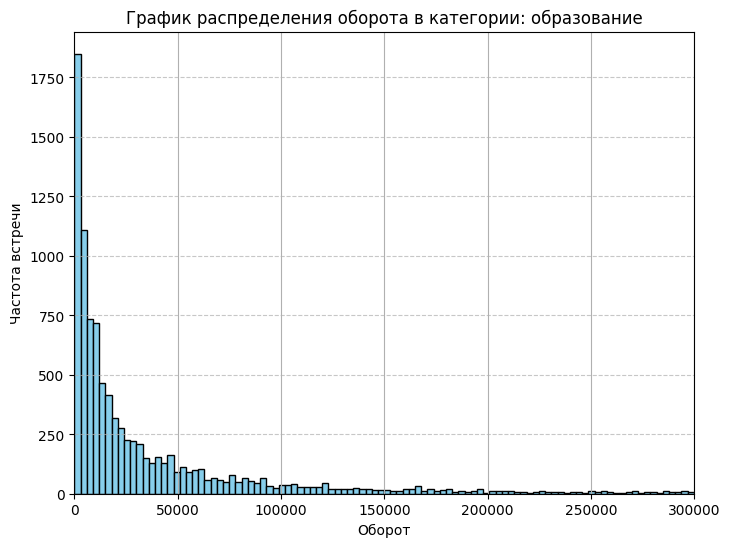

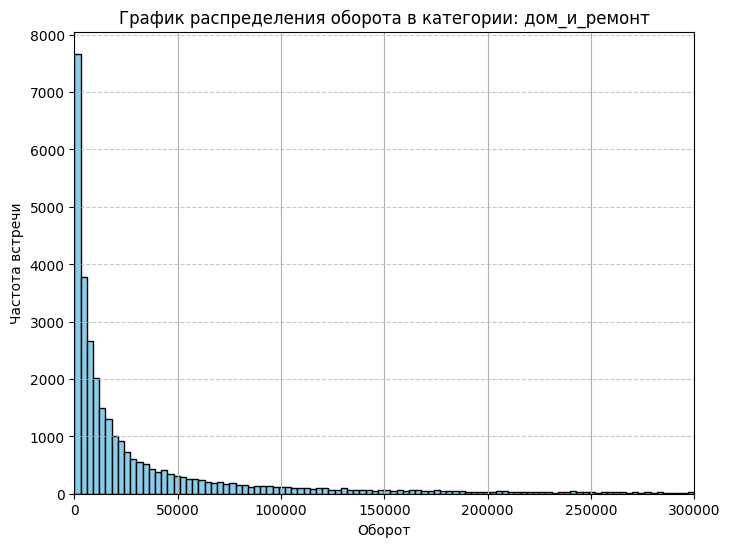

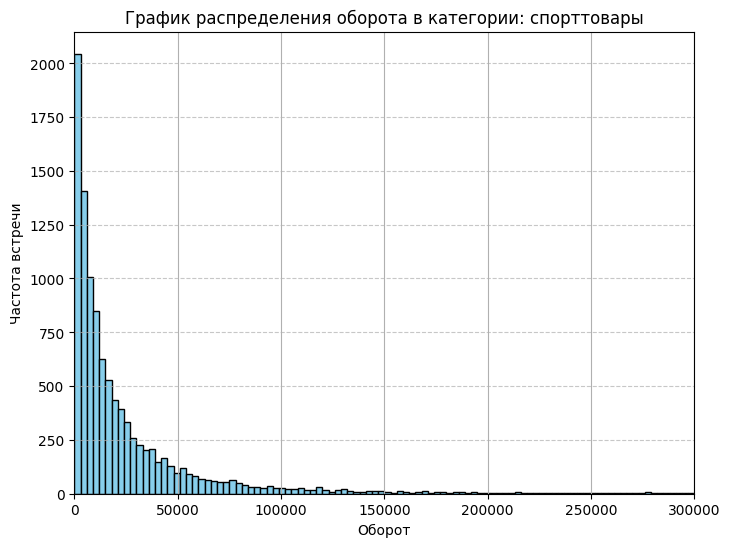

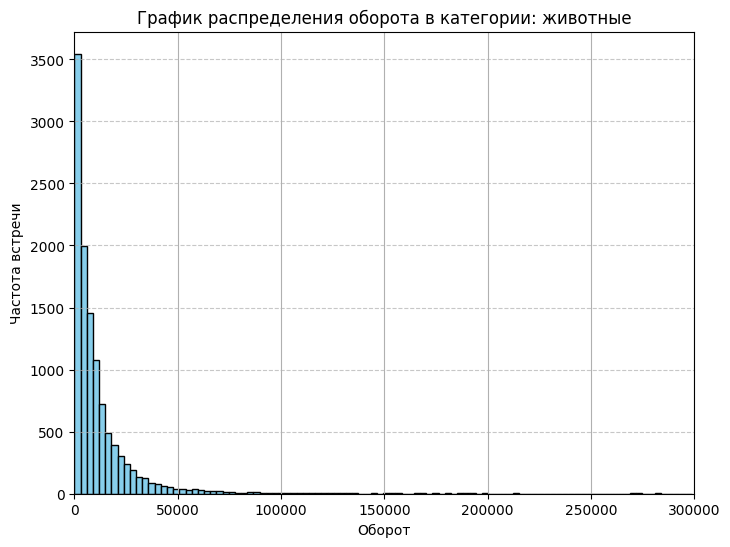

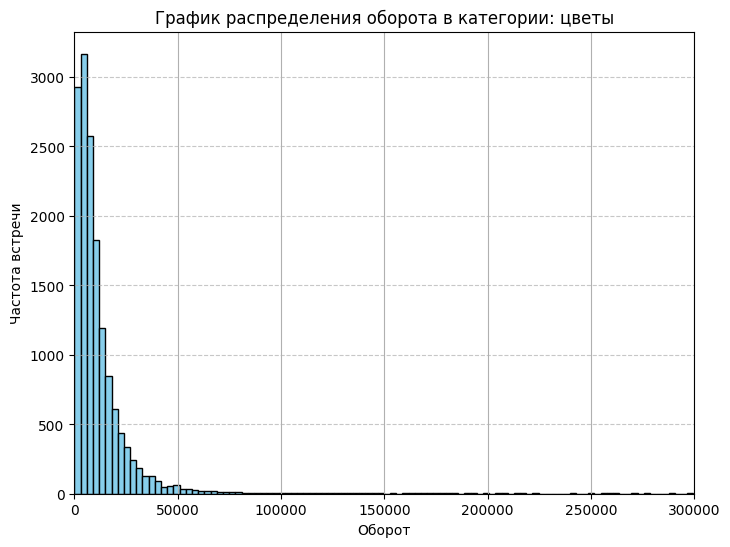

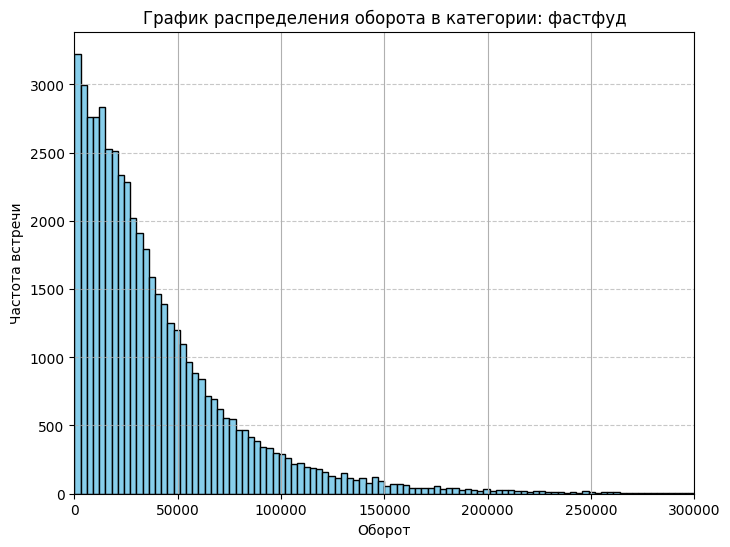

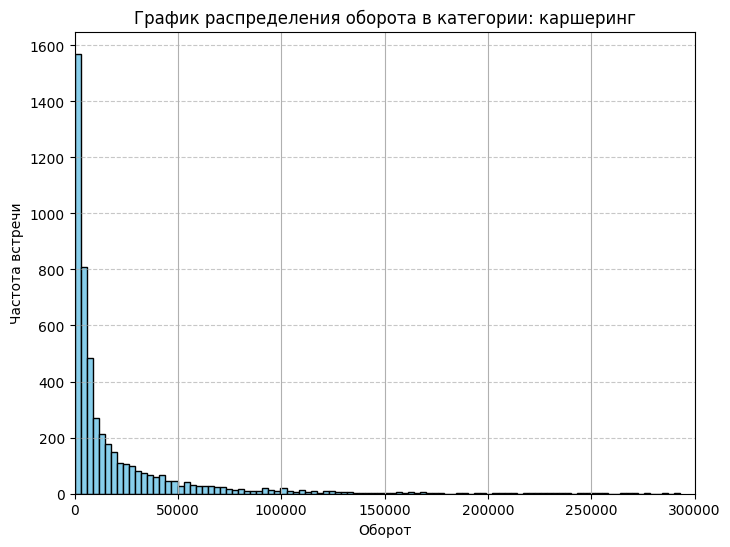

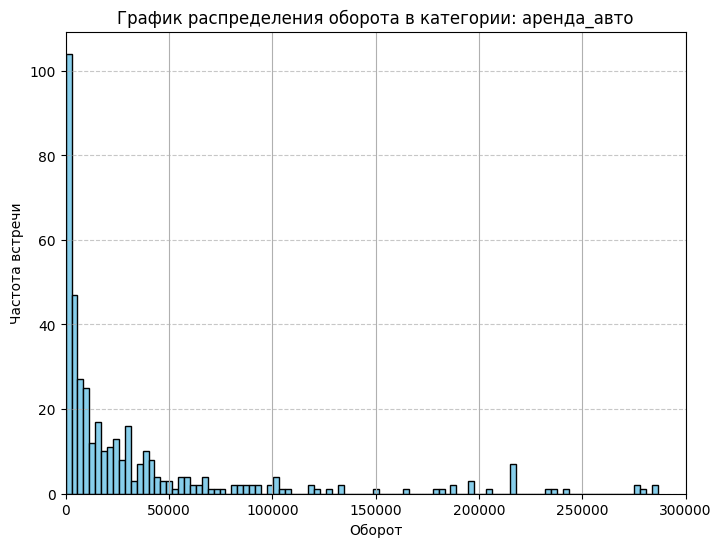

In [ ]:
for cat in categories:
    category = 'оборот_' + cat
    plt.figure(figsize=(8, 6))
    value_limit = 300000
    filtered_data = df.dropna(subset=[category])[(df[category] < value_limit) & (df['is_vybr'] == 0) & (df[category] != 0)]
    filtered_data[category].hist(bins=100, color='skyblue', edgecolor='black')
    plt.title('График распределения оборота в категории: ' + cat)
    plt.xlabel('Оборот')
    plt.ylabel('Частота встречи')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(0, value_limit)
    plt.show()

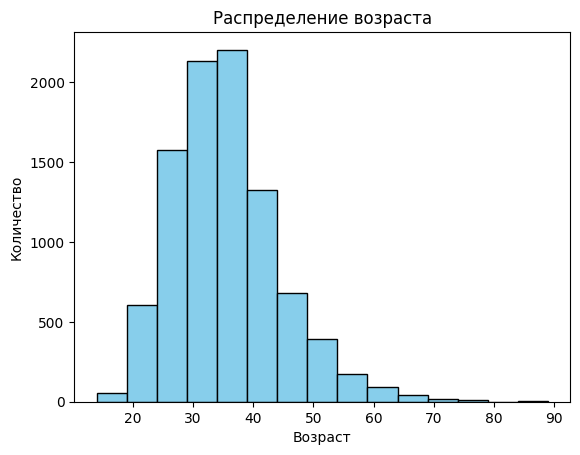

In [ ]:
plt.hist(df.groupby('ключ_клиента')['возраст'].mean(), color='skyblue', bins=15, edgecolor='black')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

In [ ]:
data = pd.read_excel('T_cashback_dataset.xlsx')
data

,ключ_клиента,регион_проживания,город_проживания,возраст,пол,месяц_покупок,оборот_аптеки,оборот_рестораны,оборот_одежда_и_обувь,оборот_автоуслуги,...,кэшбэк_развлечения,кэшбэк_жд_билеты,кэшбэк_образование,кэшбэк_дом_и_ремонт,кэшбэк_спорттовары,кэшбэк_животные,кэшбэк_цветы,кэшбэк_фастфуд,кэшбэк_каршеринг,кэшбэк_аренда_авто
0,1889,Москва,Москва,50,M,2023-04-01,18993.0,99900.0,3294.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1889,Москва,Москва,50,M,2023-05-01,37807.0,92424.0,NaN,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1889,Москва,Москва,50,M,2023-06-01,20791.0,124800.0,51246.0,67490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1889,Москва,Москва,50,M,2023-07-01,131129.0,18060.0,78120.0,2400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1889,Москва,Москва,50,M,2023-08-01,44096.0,198480.0,19080.0,147705.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59821,1005319581,Москва,Москва,37,NaN,2023-05-01,657.0,54375.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59822,1005319581,Москва,Москва,37,NaN,2023-06-01,NaN,128070.0,NaN,NaN,...,270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59823,1005319581,Москва,Москва,37,NaN,2023-07-01,5919.0,26085.0,NaN,NaN,...,1365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59824,1005319581,Москва,Москва,37,NaN,2023-08-01,1705.0,111690.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def remove_outliers_iqr(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    clean_df = dataframe.loc[~((dataframe <= lower_bound) | (dataframe >= upper_bound)).any(axis=1)]

    return clean_df

# Применяем функцию к вашему DataFrame
cleaned_df = remove_outliers_iqr(data.select_dtypes(include='number'))

# Выводим результат
cleaned_df

,ключ_клиента,возраст,оборот_аптеки,оборот_рестораны,оборот_одежда_и_обувь,оборот_автоуслуги,оборот_супермаркеты,оборот_такси,оборот_красота,оборот_развлечения,...,кэшбэк_развлечения,кэшбэк_жд_билеты,кэшбэк_образование,кэшбэк_дом_и_ремонт,кэшбэк_спорттовары,кэшбэк_животные,кэшбэк_цветы,кэшбэк_фастфуд,кэшбэк_каршеринг,кэшбэк_аренда_авто
43,331214,40,4179.0,3171.0,14994.0,2100.0,188048.0,NaN,NaN,900.0,...,45.0,NaN,NaN,NaN,NaN,564.0,NaN,NaN,NaN,NaN
44,331214,40,4357.0,570.0,NaN,13140.0,168001.0,4098.0,NaN,8250.0,...,NaN,NaN,NaN,NaN,NaN,315.0,NaN,NaN,NaN,NaN
46,331214,40,NaN,6321.0,1494.0,97358.0,183755.0,NaN,NaN,300.0,...,NaN,NaN,NaN,NaN,NaN,369.0,NaN,NaN,NaN,NaN
47,331214,40,9974.0,21306.0,NaN,900.0,135845.0,4125.0,6900.0,9390.0,...,NaN,NaN,NaN,NaN,NaN,699.0,NaN,NaN,NaN,NaN
50,378992,38,NaN,6646.0,7683.0,NaN,50602.0,2250.0,NaN,7200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59814,1003493065,42,NaN,870.0,NaN,NaN,35005.0,1548.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59818,1003493065,42,23215.0,88242.0,39810.0,2145.0,118044.0,2877.0,NaN,30000.0,...,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59819,1003493065,42,23563.0,24678.0,35783.0,NaN,173542.0,4545.0,3150.0,NaN,...,NaN,NaN,NaN,465.0,NaN,NaN,NaN,NaN,NaN,NaN
59820,1005319581,37,NaN,22567.0,NaN,NaN,6831.0,13722.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
